In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_bocim_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Beta-Ocimene
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.666667
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.666667
2,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.666667
3,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.666667
4,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74997,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
74998,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..Beta-Ocimene', 'index'], axis = 1)
y = df_knn[['X..Beta-Ocimene']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.66666667],
       [0.66666667],
       [0.66666667],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

<AxesSubplot:ylabel='Count'>

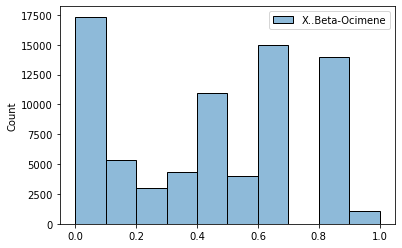

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.05273739914216839

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.013873995178757852

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.11778792458804023

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9073239776009138

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.8437139072593014

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([1.02380964e-01, 8.80140839e-02, 1.08674004e-01, 9.03206599e-02,
       9.91844001e-02, 2.92791563e-02, 5.95412588e-04, 2.08494039e-01,
       6.87800041e-04, 1.65488590e-03, 3.08233237e-03, 0.00000000e+00,
       6.89417008e-03, 1.16665348e-03, 2.37769979e-03, 3.76095000e-03,
       7.37602050e-03, 6.38242622e-03, 0.00000000e+00, 5.90643068e-03,
       0.00000000e+00, 0.00000000e+00, 6.65542746e-03, 6.28701887e-03,
       6.89559475e-03, 1.37030930e-03, 6.59032545e-03, 9.00152261e-04,
       0.00000000e+00, 2.45697007e-03, 9.66040687e-03, 0.00000000e+00,
       6.76423939e-03, 0.00000000e+00, 0.00000000e+00, 9.74097449e-03,
       4.04571665e-03, 7.07037830e-03, 1.19505526e-03, 1.11808089e-03,
       6.92246905e-05, 7.80414651e-03, 1.44301406e-03, 3.10642271e-03,
       5.68337982e-04, 4.14409291e-03, 8.75239993e-04, 6.18386103e-04,
       8.04787718e-03, 6.97124721e-04, 7.93805806e-03, 6.79162284e-03,
       4.67072516e-03, 7.53550524e-04, 4.18147145e-03, 1.16790468e-03,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,sativa,orange,vanilla
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
2,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
3,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
4,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0
...,...,...,...,...,...,...,...,...,...
74995,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,0,0,0
74996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,0,0
74997,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0,0,0
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'sativa',
 'orange',
 'vanilla']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_bocim.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_bocim.pkl")

['selector_knn_lsa_elbow_bocim.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.05747734206557925

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.015015356460601767

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1225371635896709

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.89576985033927

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.8320243065192366

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.03490564025617305

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.10126162429977612

In [57]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.981057433310271

In [58]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.885290186158509

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_bocim.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_bocim.pkl")

['y_test_knreg_lsa_elbow_bocim.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.033921997662231564

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.009977623203301922

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.09988805335625438

In [64]:
r2_score(y_test, y_pred_knreg_test)

0.8868833540132554

In [65]:
y_test

,X..Beta-Ocimene
11591,0.461538
52020,0.061144
34666,0.051282
22169,0.606838
23049,0.606838
...,...
60863,0.371795
32316,0.551282
60933,0.371795
43206,0.807692


In [66]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

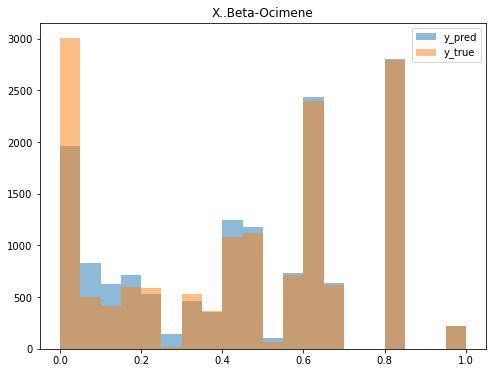

<Figure size 432x288 with 0 Axes>

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Beta-Ocimene"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_bocim.png')

Pearson R

In [68]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.944
P-value: 0.000


<AxesSubplot:>

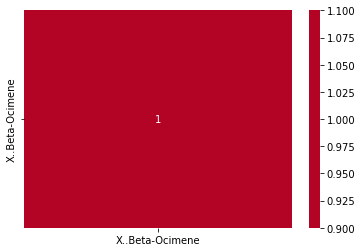

In [69]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)